<a href="https://colab.research.google.com/github/mohiiit71/Loan-Approval/blob/main/Loan_Sanctioned_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/loan_sanction_test.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
columns = df.columns
print(columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [ ]:
print(df['Loan_Amount_Term'].value_counts())

Loan_Amount_Term
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: count, dtype: int64


In [ ]:
#handling missing values
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [ ]:
categorical_fills = ['Gender','Dependents','Self_Employed']
for c in categorical_fills:
  df[c] = df[c].fillna(df[c].mode()[0])

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


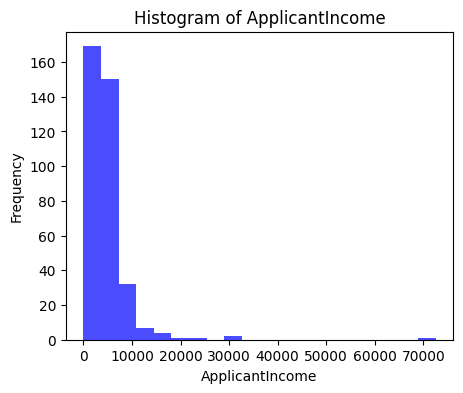

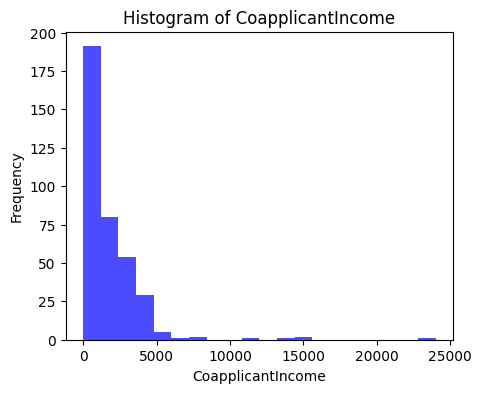

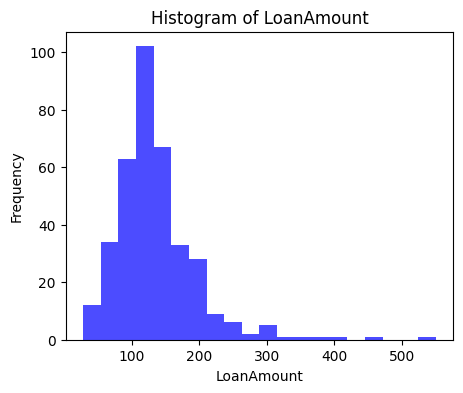

In [ ]:
numeric_columns= ["ApplicantIncome","CoapplicantIncome","LoanAmount"]

for c in numeric_columns:
  plt.figure(figsize=(5,4))
  plt.hist(df[c], bins=20, color='blue', alpha=0.7)
  plt.title(f"Histogram of {c}")
  plt.xlabel(c)
  plt.ylabel('Frequency')
  plt.show()

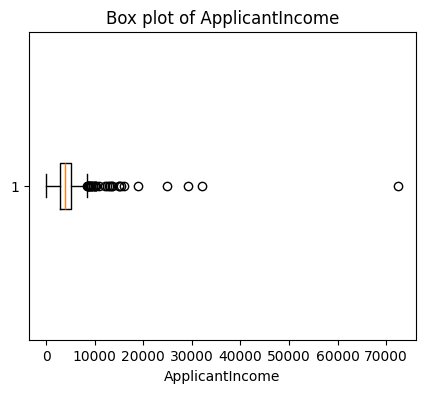

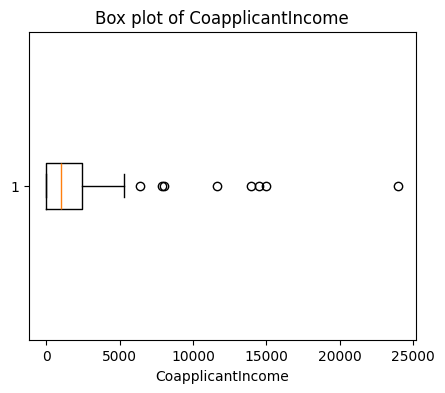

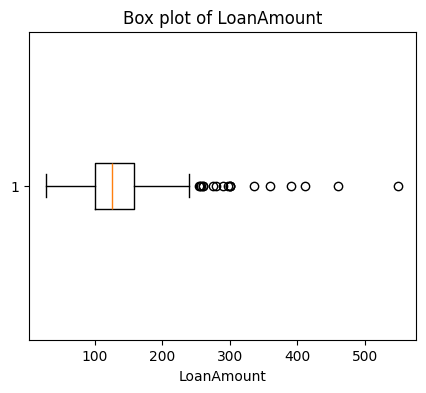

In [ ]:
for c in numeric_columns:
  plt.figure(figsize=(5,4))
  plt.boxplot(df[c], vert=False)
  plt.title(f"Box plot of {c}")
  plt.xlabel(c)
  plt.show()

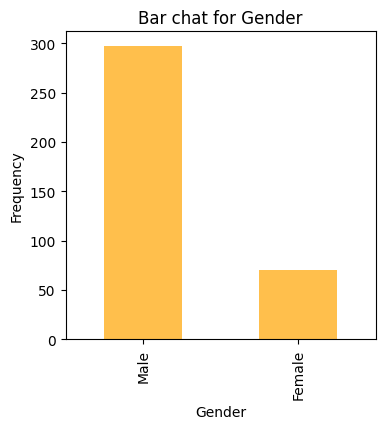

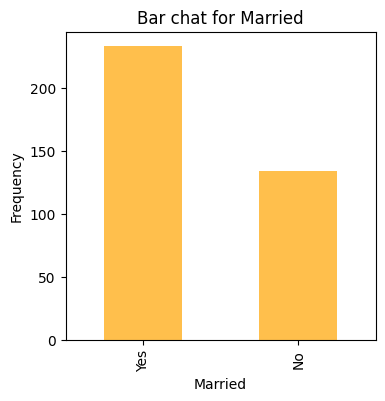

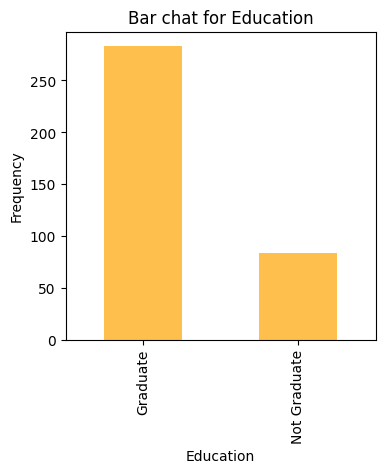

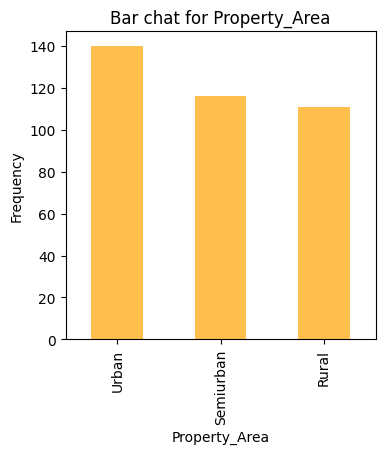

In [ ]:
categorical_columns = ["Gender","Married","Education","Property_Area"]

for c in categorical_columns:
  plt.figure(figsize=(4,4))
  df[c].value_counts().plot(kind='bar', color='orange' , alpha=0.7)
  plt.title(f"Bar chat for {c}")
  plt.xlabel(c)
  plt.ylabel('Frequency')
  plt.show()

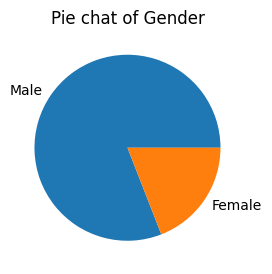

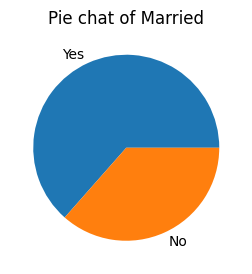

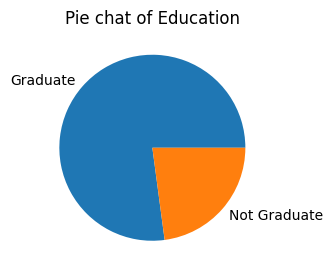

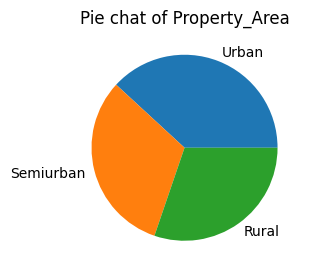

In [ ]:
for c in categorical_columns:
  plt.figure(figsize=(3,4))
  df[c].value_counts().plot(kind='pie')
  plt.title(f"Pie chat of {c}")
  plt.ylabel('')
  plt.show()

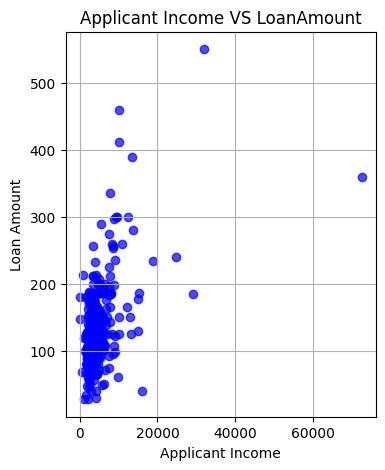

In [ ]:
plt.figure(figsize=(4,5))
plt.scatter(df['ApplicantIncome'],df['LoanAmount'], alpha=0.7, color='blue')
plt.title('Applicant Income VS LoanAmount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

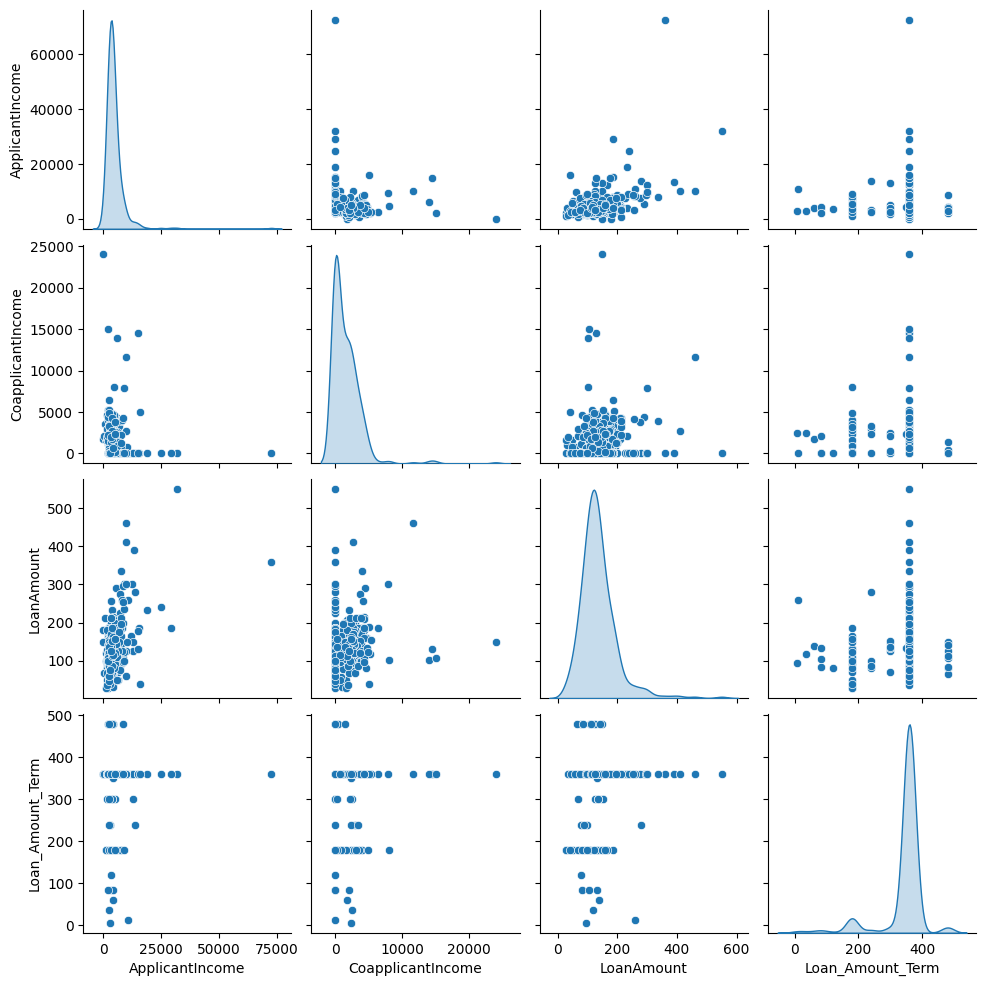

In [ ]:
sns.pairplot(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']], diag_kind='kde')
plt.show()

<ipython-input-56-e9d1d0447109>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Education',y='LoanAmount',data=df,palette="muted")


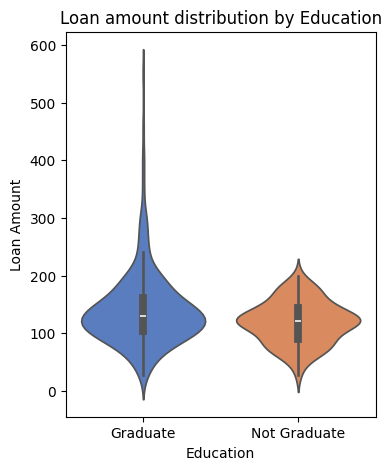

In [ ]:
plt.figure(figsize=(4,5))
sns.violinplot(x='Education',y='LoanAmount',data=df,palette="muted")
plt.title('Loan amount distribution by Education')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

In [ ]:
correlation= df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].corr()
correlation

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.488737,0.023319,0.094944
CoapplicantIncome,-0.110335,1.000000,0.150034,-0.008633,-0.058004
LoanAmount,0.488737,0.150034,1.000000,0.091867,-0.012932
Loan_Amount_Term,0.023319,-0.008633,0.091867,1.000000,-0.048189
Credit_History,0.094944,-0.058004,-0.012932,-0.048189,1.000000


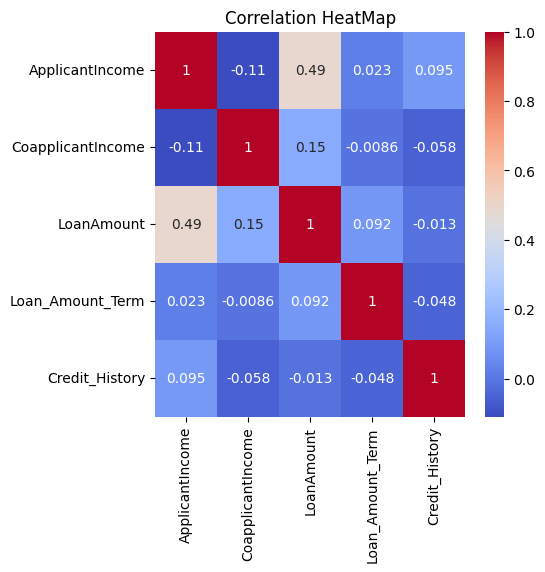

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation HeatMap')
plt.show()

In [ ]:
columns = df.columns
print(columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


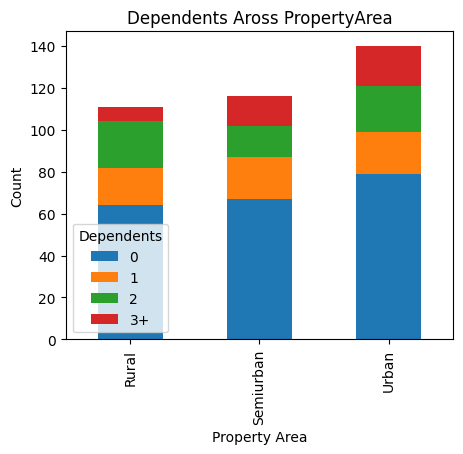

In [ ]:
property_edu= df.groupby(['Property_Area','Dependents']).size().unstack()

property_edu.plot(kind='bar', stacked=True, figsize=(5,4))
plt.title('Dependents Aross PropertyArea')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.legend(title='Dependents')
plt.show()